Series and Data Frames are the main Pandas structures used. However, in many sectors of industry, you need to work with dates, times and time-indexed data. Pandas has a special structure to manage this type of data called a Time Series.

A Time Series is a collection of data at specific dates/times — Pandas time/date objects can act as the Index (row labels) for data in a Series or Data Frame. This kind of data is essential in the real world. Information such as transaction dates in banking information or measurements from sensors monitoring your heartbeat when you are doing physical activity all rely on having the ability to record dates or time.

Time Series data generally has one or more attributes, all of which can be recorded with Pandas:

Timestamps are a particular moment in time (e.g. Mon 5 Oct 2019, 3:45:20 pm).
Timedeltas are a duration of time that has a beginning and endpoint (e.g. 5 seconds).
Periods are a special case of Timedeltas that are regular (e.g. repeated every 5 seconds).
During this section, you will perform several operations over dates and time. Pandas Time Series build off of the Python DateTime objects that you covered in Week 1: Date and Time. Review that section to refresh your memory on how you can use DateTime objects. You will find that Time Series work similarly. As you have seen throughout your study of Pandas, Pandas provides the functionality of Python but built on top of NumPy to get faster processing. Time Series are the same — Python DateTime functionality with NumPy speed.

In [1]:
# first import the libraries: Numpy, pandas and datetime

import numpy as np
import pandas as pd
import datetime

## How Pandas represents dates, times and intervals

To build a Time Series, you first need to know how to create each of the three objects: Timestamp, Timedelta and Period.

###  Timestamp

Let's start with Timestamp. There are many ways you can create a Timestamp object. Any of the formats you used to create DateTime objects will work. The following examples cover a range of ways to create Timestamp objects.

In [2]:
# create a Timestamp object
# argument: year, month, day, hour, minutes, seconds
pd.Timestamp(2019,10,9)

#You can see the last two number are zero this is because
#they represent the hour, minutes and seconds 
# which we did not provide in this example

Timestamp('2019-10-09 00:00:00')

In [3]:
# adding the hour and minutes
pd.Timestamp(2019,10,9,14,30)

Timestamp('2019-10-09 14:30:00')

In [6]:
# getting the current time
pd.Timestamp('now')

Timestamp('2021-05-27 17:59:41.597997')

In [7]:
pd.Timestamp("8 June 2016 2:45 pm")

Timestamp('2016-06-08 14:45:00')

### Timedelta

A Timedelta allows you to create an Object that you can use to represent an offset. For example, if you wanted to add one day to all of your data, you can create a one-day Timedelta and then add that Timedelta to all of your Timestamp objects. Timedelta give you a way to express such things as:

increase the time by 10 seconds

find all data between the current time and the current time plus 3 days.

In [8]:
# create a time delta 
# years= , months= ,days= ,hours= ,seconds= ,milliseconds= ,microseconds= 
pd.Timedelta(weeks=1, days=3, hours=4, seconds=5, milliseconds=6,microseconds=7)

# note in the result how Timedelta is converted: 1 week becomes 7 days

Timedelta('10 days 04:00:05.006007')

In [9]:
# you can also go backwards in time by using '-'
pd.Timedelta(weeks=-1, hours=4)

Timedelta('-7 days +04:00:00')

In [10]:
# string description also works
pd.Timedelta("1 day 20 seconds")

Timedelta('1 days 00:00:20')

In [12]:
# use a Timedalta to increase a time by 10 seconds
time = pd.Timestamp('now')
print(time)
shift10Sec = pd.Timedelta("10 seconds")
print('time + 10 seconds: ', time+shift10Sec)

2021-05-27 18:11:05.981446
time + 10 seconds:  2021-05-27 18:11:15.981446


### Period

Timedelta represents a change or difference, whereas Period represents a time span. For example, you would use Timedelta to express: today + one day (one day is a Timedelta). You would use a Period to express: every day, every hour, every third week.

In [13]:
# create a period
# frequence, year, month, quarter, day, hour, ,minute, second
# you can find all the frequency options at: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

pr = pd.Period(freq='H', year=2019, month=4, quarter=2, day=11, hour=8, minute=36, second=5)

print(pr)

# you can do arithmetic on a period to increase by the frequency
# note that the amount of change is base on the frequancy (Hour: H) of period

print(pr+1)
print(pr-2)


2019-04-11 08:00
2019-04-11 09:00
2019-04-11 06:00


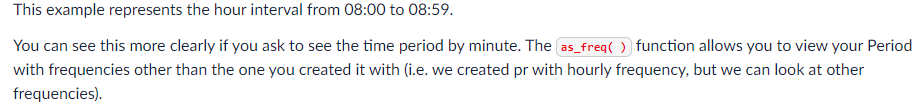

as before, the frequency options can be found at:\
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [14]:
print(pr.asfreq('min'))
print(pr.asfreq('min')-2)

2019-04-11 08:59
2019-04-11 08:57


Hopefully, you can see that the Period represents a timespan. It may not be immediately obvious how a Period object is going to allow you to express every other day, given it is just a single date or time. You will see how it is used shortly, but for now, it is just important to understand that Timestamps represent a single instance in time, Timedeltas represent an offset or change in time, and Periods represent a time span.